In [3]:
!pip install wordcloud

In [9]:
!pip install --upgrade nltk

In [4]:
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import time


# Descargar el léxico VADER y las stopwords de NLTK si no están descargados previamente
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
!pip install --upgrade nltk

In [6]:
# Leemos los dataframes
tweets = pd.read_csv('tweets_limpios_esp_vacios2.csv',sep=',')

In [7]:
tweets.head()

,Nombre BD,Nombre Usuario,Tweet,Tweet Limpio
0,Cantantes_Colombianos,Camilo,Gallo pinto en Costa Rica... y otras maneras d...,gallo pinto en costa rica y otras maneras de d...
1,Cantantes_Colombianos,Camilo,"RT @rincondelatribu: La Tribu tiene casa, un h...",la tribu tiene casa un hogar es aqui
2,Cantantes_Colombianos,Camilo,Contando los días!! Ya quiero iiiiiiirrrrrr 🇧🇷...,contando los dias ya quiero iiiiiiirrrrrr
3,Cantantes_Colombianos,Camilo,En el aeropuerto en Buenos Aires por salir a c...,en el aeropuerto en buenos aires por salir a c...
4,Cantantes_Colombianos,Camilo,Recorriendo el mundo con mi esposa y mi hija h...,recorriendo el mundo con mi esposa y mi hija h...


In [10]:
# Crear una instancia del analizador de sentimientos VADER
sia = SentimentIntensityAnalyzer()

# Crear un lematizador de NLTK
lemmatizer = nltk.stem.WordNetLemmatizer()

# Función para realizar el análisis de sentimientos en un tweet y obtener el texto preprocesado
def analyze_sentiment_and_preprocess(tweet):
    # Tokenización con NLTK
    words = word_tokenize(tweet, language='spanish')

    # Eliminación de stopwords con NLTK
    stop_words = set(stopwords.words('spanish'))
    words = [word for word in words if word.lower() not in stop_words]

    # Lematización con NLTK
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in words if word.isalpha()]

    # Reconstrucción del texto preprocesado
    lem_tweet = ' '.join(lemmatized_tokens)

    # Aplicación del analizador de sentimientos VADER
    sentiment = sia.polarity_scores(lem_tweet)
    
    if sentiment['compound'] >= 0.05:
        sentiment_label = 'Positivo'
    elif sentiment['compound'] <= -0.05:
        sentiment_label = 'Negativo'
    else:
        sentiment_label = 'Neutral'
    
    return lem_tweet, sentiment_label

# Función para aplicar el análisis de sentimientos y obtener el texto preprocesado en paralelo
def analyze_sentiment_and_preprocess_parallel(column):
    with ThreadPoolExecutor(max_workers=4) as executor:  # Ajusta el número de hilos según tus necesidades
        results = list(tqdm(executor.map(analyze_sentiment_and_preprocess, column), total=len(column), desc="Analizando Sentimientos y Preprocesando"))
    return results

# Medir el tiempo de inicio
start_time = time.time()

# Supongamos que tienes un DataFrame llamado 'tweets' con una columna 'Tweet Limpio'
# Cambia 'tweets' y 'Tweet Limpio' por los nombres reales de tu DataFrame y columna
results = analyze_sentiment_and_preprocess_parallel(tweets['Tweet Limpio'])

# Obtener los resultados de texto preprocesado y sentimiento en listas separadas
preprocessed_text, sentiment_labels = zip(*results)

# Crear nuevas columnas en el DataFrame para el texto preprocesado y el sentimiento
tweets['Texto Preprocesado NLTK'] = preprocessed_text
tweets['Sentimiento VADER'] = sentiment_labels

# Medir el tiempo de finalización
end_time = time.time()

# Calcular el tiempo total de ejecución
total_time = end_time - start_time

# Guardar el DataFrame resultante con los textos preprocesados y el sentimiento en un nuevo archivo CSV
tweets.to_csv('tweets_con_texto_preprocesado.csv', index=False)

# Imprimir el tiempo total de ejecución
print(f"Tiempo total de ejecución: {total_time} segundos")


Analizando Sentimientos y Preprocesando: 100%|███████████████████████████████| 443442/443442 [06:00<00:00, 1230.17it/s]


Tiempo total de ejecución: 382.8195035457611 segundos


In [11]:
tweets.head()

,Nombre BD,Nombre Usuario,Tweet,Tweet Limpio,Texto Preprocesado NLTK,Sentimiento VADER
0,Cantantes_Colombianos,Camilo,Gallo pinto en Costa Rica... y otras maneras d...,gallo pinto en costa rica y otras maneras de d...,gallo pinto costa rica maneras disfrutar vida,Neutral
1,Cantantes_Colombianos,Camilo,"RT @rincondelatribu: La Tribu tiene casa, un h...",la tribu tiene casa un hogar es aqui,tribu casa hogar aqui,Neutral
2,Cantantes_Colombianos,Camilo,Contando los días!! Ya quiero iiiiiiirrrrrr 🇧🇷...,contando los dias ya quiero iiiiiiirrrrrr,contando dia quiero iiiiiiirrrrrr,Neutral
3,Cantantes_Colombianos,Camilo,En el aeropuerto en Buenos Aires por salir a c...,en el aeropuerto en buenos aires por salir a c...,aeropuerto buenos aire salir conocer bolivia d...,Neutral
4,Cantantes_Colombianos,Camilo,Recorriendo el mundo con mi esposa y mi hija h...,recorriendo el mundo con mi esposa y mi hija h...,recorriendo mundo esposa hija haciendo amo cam...,Neutral


In [13]:
# Contar el número de tweets positivos
tweets_positivos = tweets[tweets['Sentimiento VADER'] == 'Positivo']

# Calcular el porcentaje de tweets positivos
porcentaje_positivos = (len(tweets_positivos) / len(tweets)) * 100

print(f"Porcentaje de tweets positivos: {porcentaje_positivos:.2f}%")

Porcentaje de tweets positivos: 6.81%


In [14]:
# Contar el número de tweets negativos
tweets_negativos = tweets[tweets['Sentimiento VADER'] == 'Negativo']

# Calcular el porcentaje de tweets negativos
porcentaje_negativos = (len(tweets_negativos) / len(tweets)) * 100

print(f"Porcentaje de tweets negativos: {porcentaje_negativos:.2f}%")

Porcentaje de tweets negativos: 1.95%


In [15]:
# Contar el número de tweets neutrales
tweets_neutrales = tweets[tweets['Sentimiento VADER'] == 'Neutral']

# Calcular el porcentaje de tweets negativos
porcentaje_neutrales = (len(tweets_neutrales) / len(tweets)) * 100

print(f"Porcentaje de tweets negativos: {porcentaje_neutrales:.2f}%")

Porcentaje de tweets negativos: 91.23%


In [16]:
# Tabla que muestra la frecuencia de cada sentimiento para cada valor único de nombre_bd
tabla = pd.crosstab(tweets['Nombre BD'], tweets['Sentimiento VADER'])
print(tabla)

Sentimiento VADER                    Negativo  Neutral  Positivo
Nombre BD                                                       
Cantantes_Colombianos                     631    34359      4572
Deportistas_Colombianos                   762    35909      4948
Empresas_Colombianas                      658    33600      6085
Famosos                                  1028    39167      4217
Futbol_Colombiano                         251    39613      1431
Instituciones_del_Estado_Colombiano       680    45494      1492
Medios_Informaticos                      1443    52246      2137
Periodistas                              1354    43363      1968
Politicos_Colombianos                    1330    42684      1890
Universidades_Colombianas                 529    38136      1465


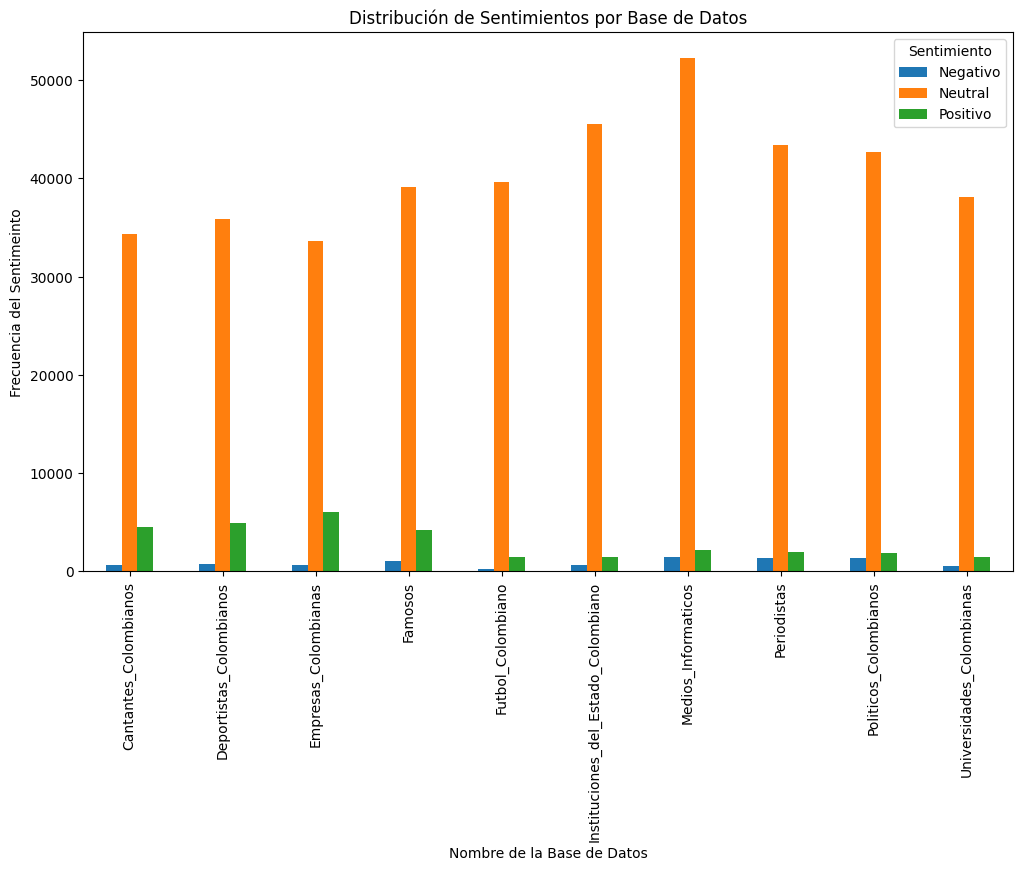

In [17]:
# Gráfico de barras agrupadas para visualizar la distribución
tabla.plot(kind='bar', figsize=(12, 7))
plt.title('Distribución de Sentimientos por Base de Datos')
plt.xlabel('Nombre de la Base de Datos')
plt.ylabel('Frecuencia del Sentimeinto')
plt.legend(title='Sentimiento', loc='upper right')
plt.show()

In [18]:
# Nube de Palabras por cada Sentimiento
# Filtra los tweets por categoría de sentimiento
tweets_positivos = tweets[tweets['Sentimiento VADER'] == 'Positivo']['Texto Preprocesado NLTK'].tolist()
tweets_negativos = tweets[tweets['Sentimiento VADER'] == 'Negativo']['Texto Preprocesado NLTK'].tolist()
tweets_neutrales = tweets[tweets['Sentimiento VADER'] == 'Neutral']['Texto Preprocesado NLTK'].tolist()

In [19]:
# Función para crear y mostrar nubes de palabras
def generar_y_mostrar_nube_de_palabras(texto, categoria):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texto))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Nube de Palabras - ' + categoria)
    plt.axis('off')
    plt.show()

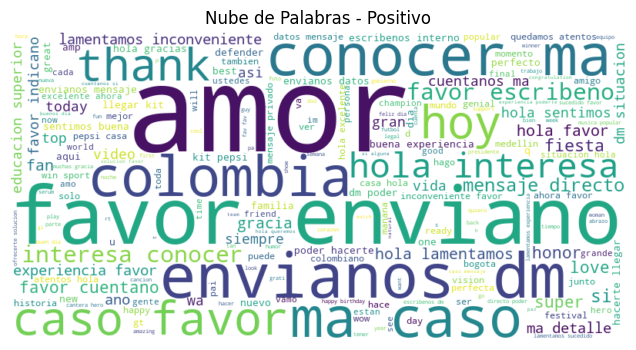

In [20]:
# Generar y mostrar nubes de palabras para Tweets Positivos
generar_y_mostrar_nube_de_palabras(tweets_positivos, "Positivo")

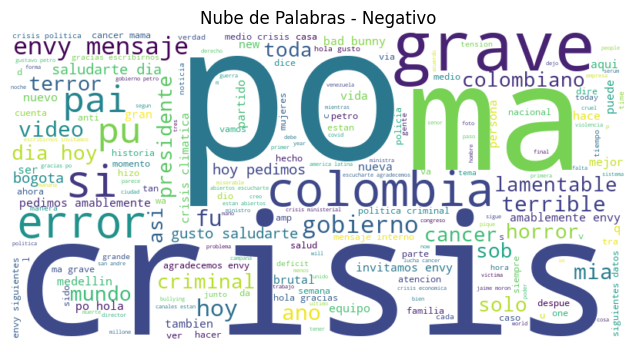

In [21]:
# Generar y mostrar nubes de palabras para Tweets Negativos
generar_y_mostrar_nube_de_palabras(tweets_negativos, "Negativo")

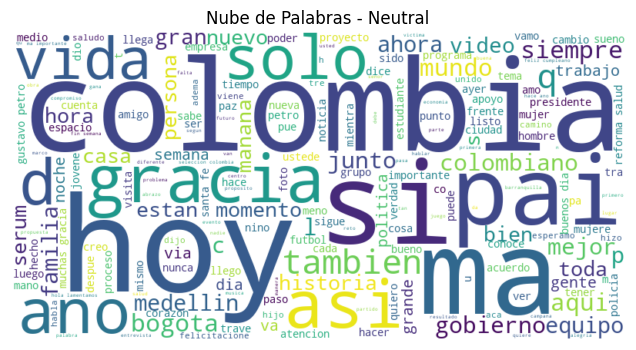

In [22]:
# Generar y mostrar nubes de palabras para Tweets Neutrales
generar_y_mostrar_nube_de_palabras(tweets_neutrales, "Neutral")